In [110]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

## Task 1

stdv: 9.142215766558298


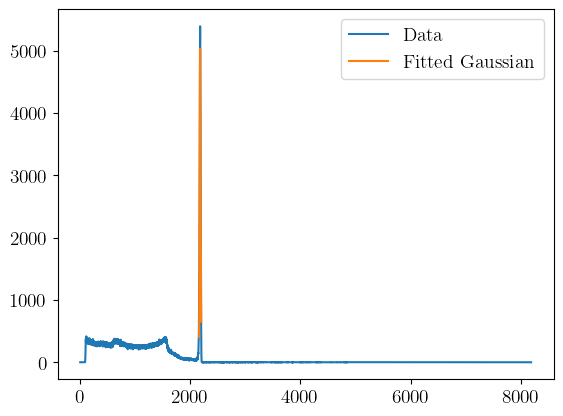

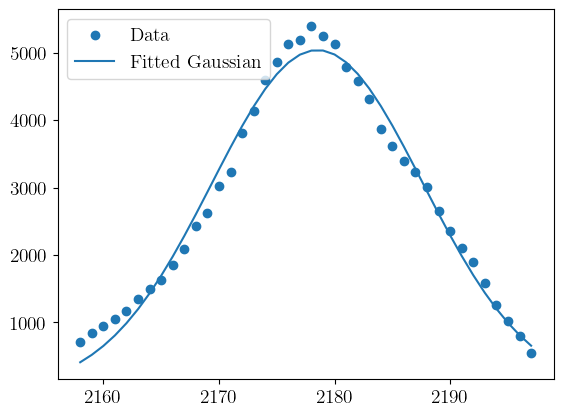

stdv: 6.442688669130202


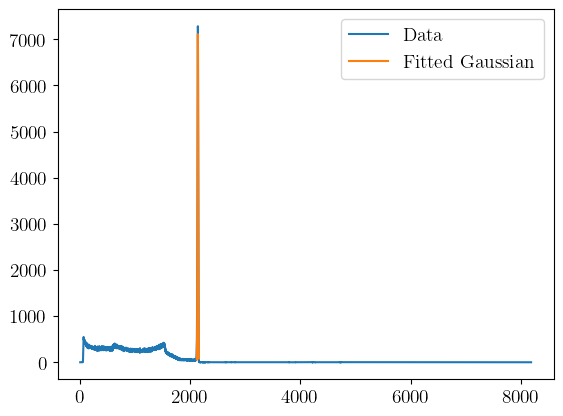

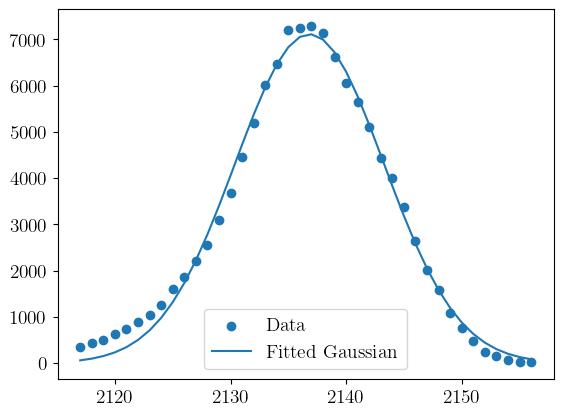

stdv: -4.683474828506527


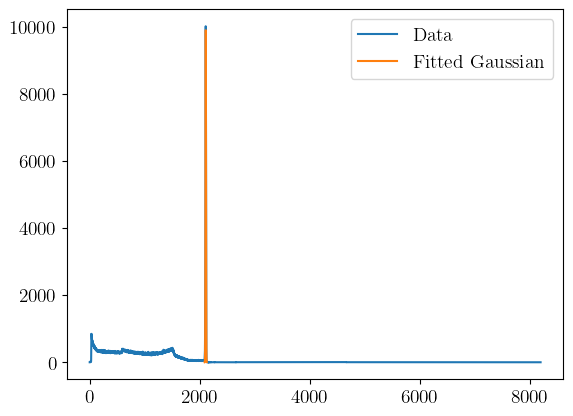

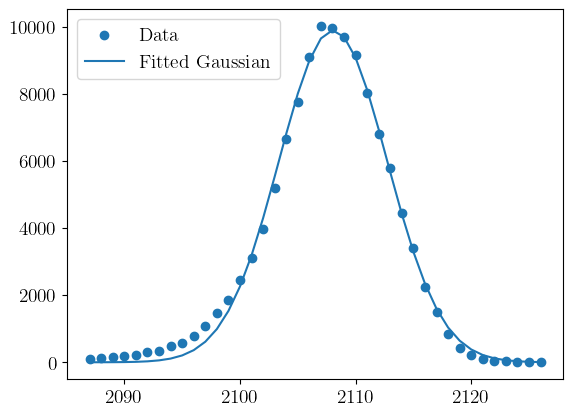

stdv: 2.934873678694544


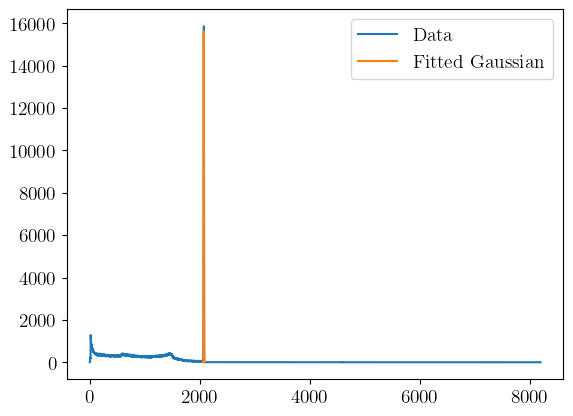

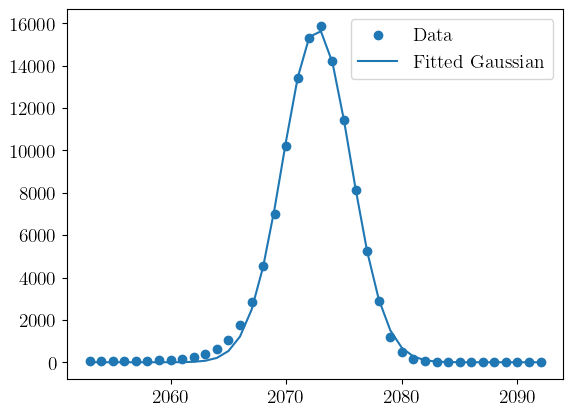

stdv: 2.353977451050651


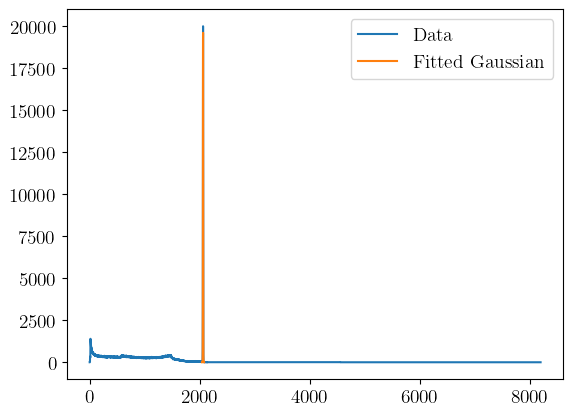

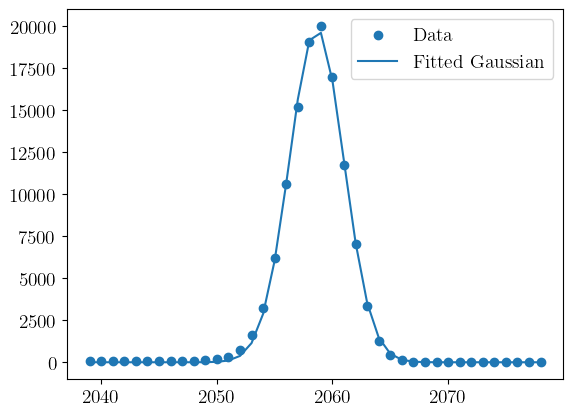

stdv: 2.011387383822805


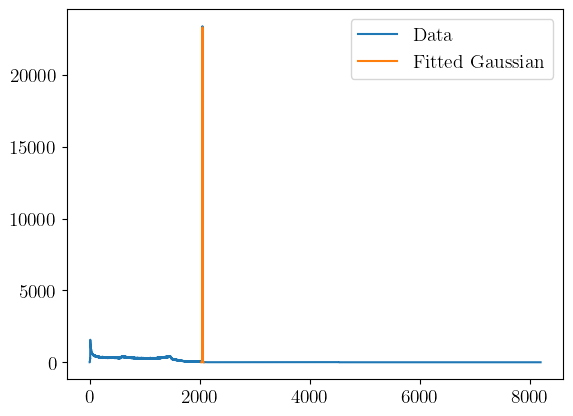

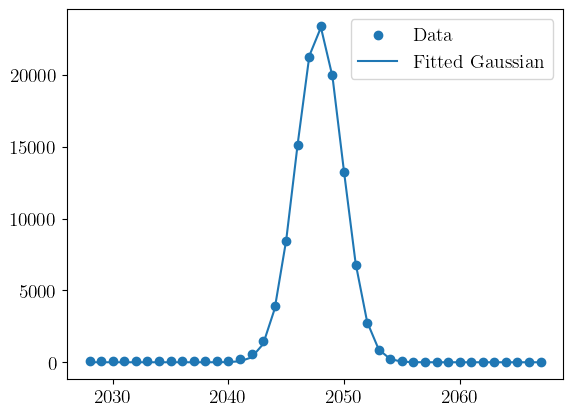

stdv: 1.8561409445744688


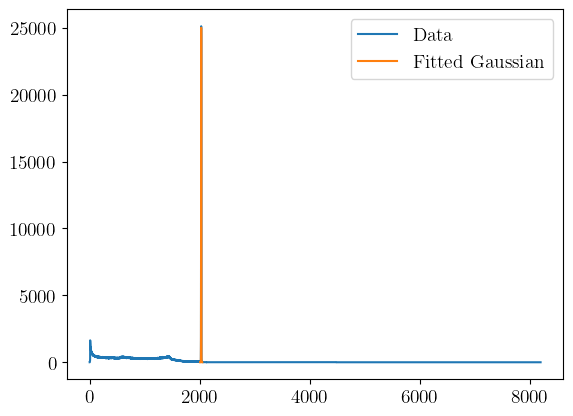

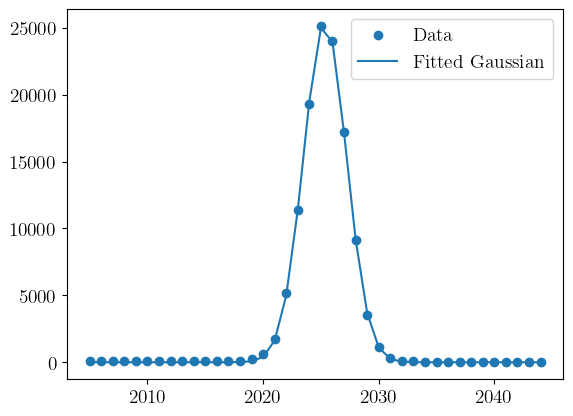

stdv: 1.8307284760839473


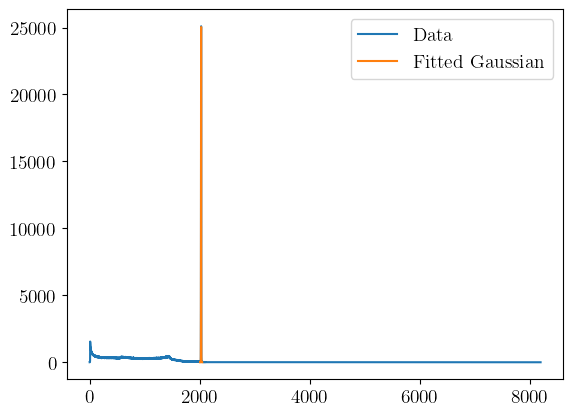

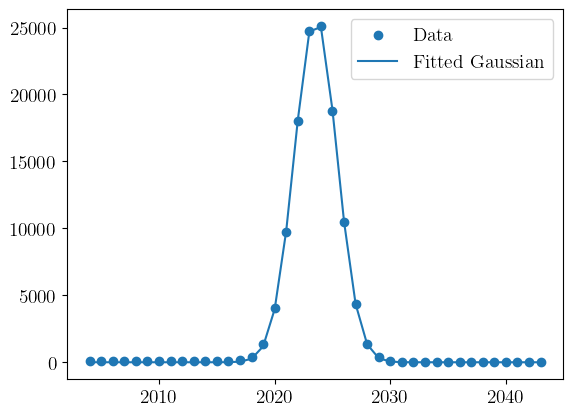

stdv: 1.8488425046350008


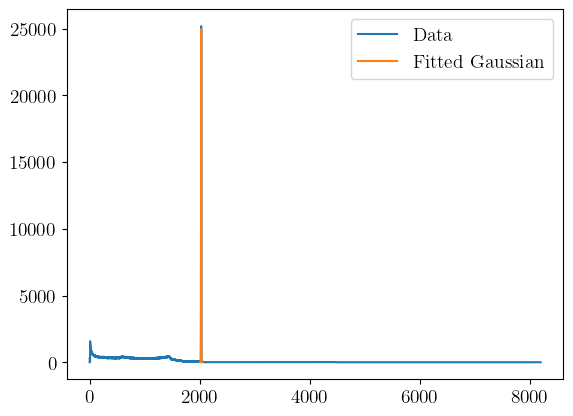

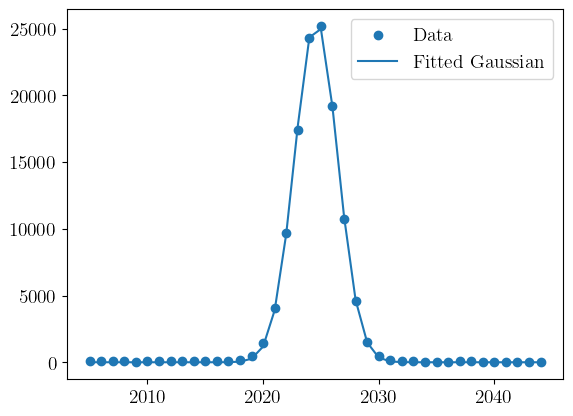

FWHM values: [21.52827294 15.17137242 11.02874041  6.91109937  5.54319329  4.73645533
  4.3708779   4.31103611  4.35369139]


In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False
})
plt.rcParams['font.size'] = 14

# Define the gaussian function
def gaussian(x, a, b, c):
    return a * np.exp(-((x - b) ** 2) / (2 * c ** 2))

# Initialize an empty list to store the FWHM values
FWHM_values = []

# Loop over the range from 1 to 9 (inclusive)
for i in range(1, 10):
    # Load the data
    data = np.loadtxt(f'Task 1/{i}.TKA', skiprows=2)

    # Create an array for indices
    indices = np.arange(len(data))

    # Find the peaks
    peaks, _ = find_peaks(data, height=2000)

    # Define the window
    window = 20

    # Define the window around the peak
    window_data = data[peaks[0] - window:peaks[0] + window]
    window_indices = indices[peaks[0] - window:peaks[0] + window]

    # Fit the gaussian
    popt, _ = curve_fit(gaussian, window_indices, window_data, p0=[2000, peaks[0], 10])

    # Calculate the FWHM and append it to the list
    print('stdv:', popt[2])
    FWHM = 2 * np.sqrt(2 * np.log(2)) * np.abs(popt[2])
    FWHM_values.append(FWHM)

    # Plot the data and the fitted Gaussian
    plt.figure()
    plt.plot(indices, data, label='Data')
    plt.plot(window_indices, gaussian(window_indices, *popt), label='Fitted Gaussian')
    plt.legend()
    plt.show()

    # Plot the data and the fitted Gaussian
    plt.figure()
    plt.scatter(window_indices, window_data, label='Data')
    plt.plot(window_indices, gaussian(window_indices, *popt), label='Fitted Gaussian')
    plt.legend()
    plt.show()

# Convert the list to a numpy array
FWHM_values = np.array(FWHM_values)

print('FWHM values:', FWHM_values)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


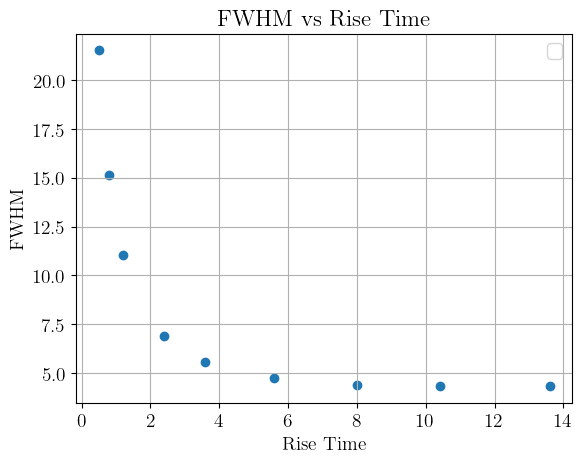

a: 31.94731542409722
b: 1.3280599618106166
c: 4.707828393120085
R^2: 0.9932652001346182


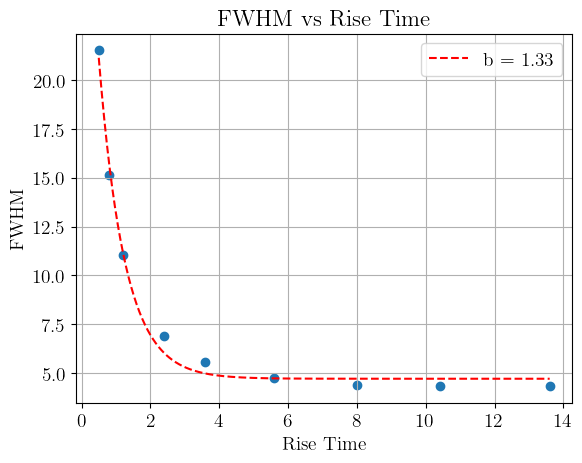

In [112]:
# Define the rise times
rise_times = np.array([0.5, 0.8, 1.2, 2.4, 3.6, 5.6, 8, 10.4, 13.6])

# Define the exponential function
def exponential(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the exponential
popt, _ = curve_fit(exponential, rise_times, FWHM_values, p0=[1, 1, 5])

# Plot the data and the fitted exponential, with the R^2 value and the parameters
plt.figure()
plt.scatter(rise_times, FWHM_values)
#plt.plot(rise_times, exponential(rise_times, *popt), label=f'b = {popt[1]:.2f}', color='red', linestyle='--')
plt.xlabel('Rise Time')
plt.ylabel('FWHM')
plt.title('FWHM vs Rise Time')
plt.grid(True)
plt.legend()
plt.show()

# Print the parameters of the exponential and R^2
print('a:', popt[0])
print('b:', popt[1])
print('c:', popt[2])
print('R^2:', np.corrcoef(FWHM_values, exponential(rise_times, *popt))[0, 1] ** 2)

# Generate a new array with more points for a higher resolution fit
rise_times_high_res = np.linspace(rise_times.min(), rise_times.max(), 500)

# Plot the data and the fitted exponential, with the R^2 value and the parameters
plt.figure()
plt.scatter(rise_times, FWHM_values)
plt.plot(rise_times_high_res, exponential(rise_times_high_res, *popt), label=f'b = {popt[1]:.2f}', color='red', linestyle='--')
plt.xlabel('Rise Time')
plt.ylabel('FWHM')
plt.title('FWHM vs Rise Time')
plt.grid(True)
plt.legend()
plt.show()



## Task 2

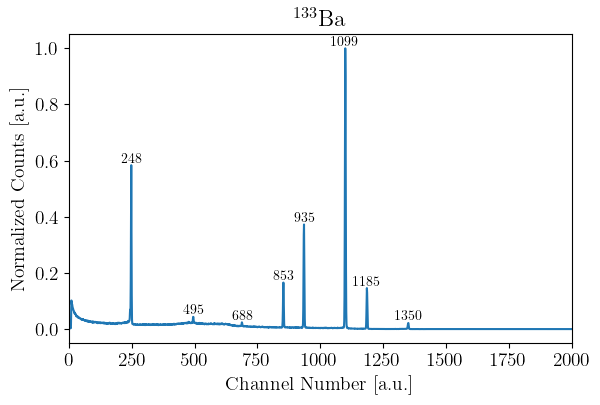

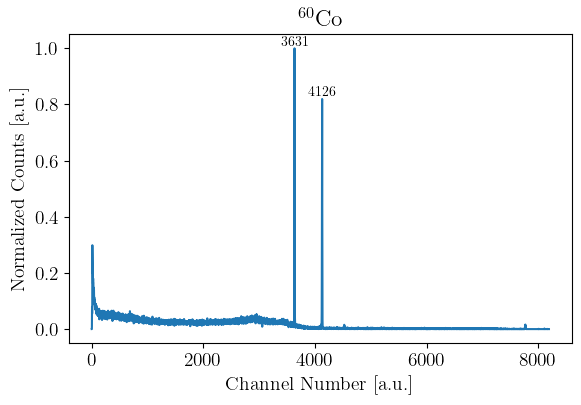

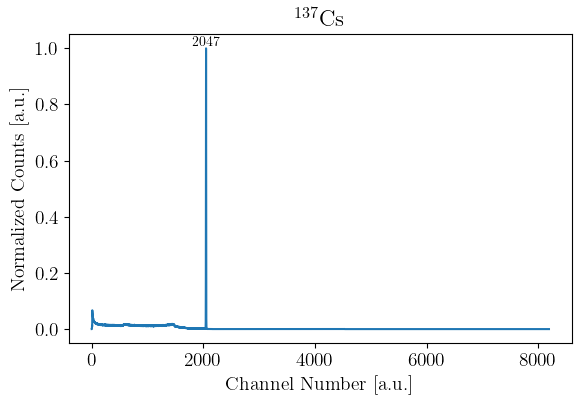

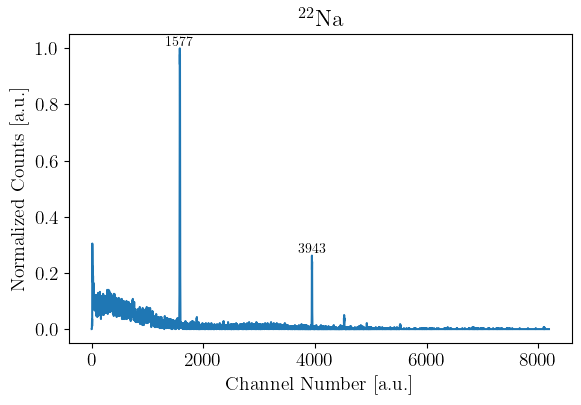

In [213]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np



# Define the path to the folder containing the .TKA files
folder_path = r'Task 2'

# Use glob to find all .TKA files in the specified folder
file_pattern = os.path.join(folder_path, '*.TKA')
tka_files = glob.glob(file_pattern)

# Initialize a list to store dataframes
dataframes = []

# Load each .TKA file into a pandas DataFrame and store it in the list
for file in tka_files:
    df = pd.read_csv(file, delimiter='\t', skiprows=2)  # Skip the first two rows
    dataframes.append((os.path.basename(file), df))

# Peak energies for each element
peak_energies = {
    'Cs137': [661.657],
    'Ba133': [80.9979, 160.6129, 223.2368, 276.3989, 302.8508, 356.0129, 383.8484, 437.0108],
    'Co60': [1173.228, 1332.492],
    'Na22': [511.0, 1274.537]  
}

# Define colors for each element
element_colors = {
    'Cs137': 'blue',
    'Ba133': 'purple',
    'Co60': 'green',
    'Na22': 'red'    
}

# Prepare lists for plotting channel number vs energy
channel_numbers = []
energies = []
colors = []
labels = []

# Plot the data from each DataFrame
for filename, df in dataframes:
    fig, ax = plt.subplots()
    fig.set_size_inches(set_size(469))  # Set the size of the figure (width, height) in inches
    
    for column in df.columns:
        # Normalize the data
        normalized_data = df[column] / df[column].max()
        
        ax.plot(normalized_data, label=column)
        
        # Detect peaks in the normalized data
        if 'Ba133' in filename:
            peaks, _ = find_peaks(normalized_data, prominence=0.01)
        else:
            peaks, _ = find_peaks(normalized_data, prominence=0.12)
        
        # Remove the first peak for Na and Co if needed
        element_name = os.path.splitext(filename)[0]
        if 'Na' in element_name or 'Co' in element_name or 'Ba' in element_name:
            peaks = peaks[1:]
        
        # Get corresponding energies from the dictionary
        peak_energy_list = peak_energies.get(element_name, [])
        
        # Collect channel numbers, energies, colors, and labels for the final plot
        for i, peak in enumerate(peaks):
            if i < len(peak_energy_list):
                channel_numbers.append(peak)
                energies.append(peak_energy_list[i])
                colors.append(element_colors.get(element_name, 'black'))
                labels.append(element_name)
            
            ax.annotate(f'{peak}', 
                        (peak, normalized_data.iloc[peak]), 
                        textcoords="offset points", 
                        xytext=(0,2), 
                        ha='center', fontsize=10)
    
    # Extract element symbol and atomic number from filename, removing the .TKA extension
    base_filename = os.path.splitext(filename)[0]
    element_symbol = ''.join(filter(str.isalpha, base_filename))
    atomic_number = ''.join(filter(str.isdigit, base_filename))
    
    # Format title in LaTeX
    title = f'$^{{{atomic_number}}}\\mathrm{{{element_symbol}}}$'
    
    
    ax.set_title(f'{title}')
    ax.set_xlabel('Channel Number [a.u.]')  
    ax.set_ylabel('Normalized Counts [a.u.]')  
    
    # Set x-axis limits for Ba133
    if 'Ba133' in filename:
        ax.set_xlim(0, 2000)
    
    plt.show()

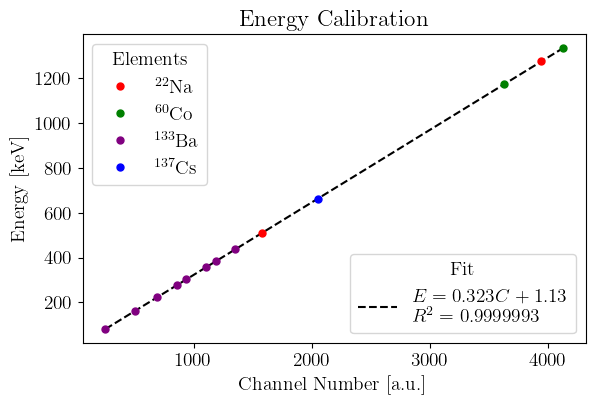

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Function to convert labels to LaTeX format
def format_label(label):
    element_symbol = ''.join(filter(str.isalpha, label))
    atomic_number = ''.join(filter(str.isdigit, label))
    return f'$^{{{atomic_number}}}${element_symbol}'

# Define a linear function for curve fitting
def linear_func(x, a, b):
    return a * x + b

# Convert channel_numbers to a NumPy array
channel_numbers = np.array(channel_numbers)

# Perform linear regression using scipy curve_fit
popt, _ = curve_fit(linear_func, channel_numbers, energies)
slope, intercept = popt

# Calculate R^2 value using sklearn
y_fit = linear_func(channel_numbers, *popt)
r_squared = r2_score(energies, y_fit)

# Generate x values for the linear fit line
x_fit = np.linspace(min(channel_numbers), max(channel_numbers), 100)
y_fit_line = linear_func(x_fit, *popt)

# Plot Channel Number vs Energy with the linear fit
fig, ax = plt.subplots()
added_labels = {}
element_handles = []
element_labels = []

# Plot the line of best fit
line_handle, = ax.plot(x_fit, y_fit_line, '--', label=f'$E = {slope:.3f}C + {intercept:.2f}$ \n $R^2 = {r_squared:.7f}$', color='black')

# Plot the data points
for i in range(len(channel_numbers)):
    formatted_label = format_label(labels[i])
    label = formatted_label if formatted_label not in added_labels else "_nolegend_"
    point_handle, = ax.plot(channel_numbers[i], energies[i], 'o', color=colors[i], label=label, markersize=5)
    if formatted_label not in added_labels:
        element_handles.append(point_handle)
        element_labels.append(formatted_label)
    added_labels[formatted_label] = True

# Reorder the elements in the legend
# 1st -> 3rd, 3rd -> 4th, 4th -> 1st
reordered_indices = [3, 1, 0, 2] + list(range(4, len(element_handles)))
element_handles = [element_handles[i] for i in reordered_indices]
element_labels = [element_labels[i] for i in reordered_indices]

# Create the first legend for the elements
element_legend = ax.legend(element_handles, element_labels, loc='upper left', title='Elements')

# Add the first legend to the plot
ax.add_artist(element_legend)

# Create the second legend for the line of best fit
ax.legend([line_handle], [line_handle.get_label()], loc='lower right', title='Fit')

ax.set_title('Energy Calibration')
ax.set_xlabel('Channel Number [a.u.]')
ax.set_ylabel('Energy [keV]')
fig.set_size_inches(set_size(469))
plt.show()

## Task 3

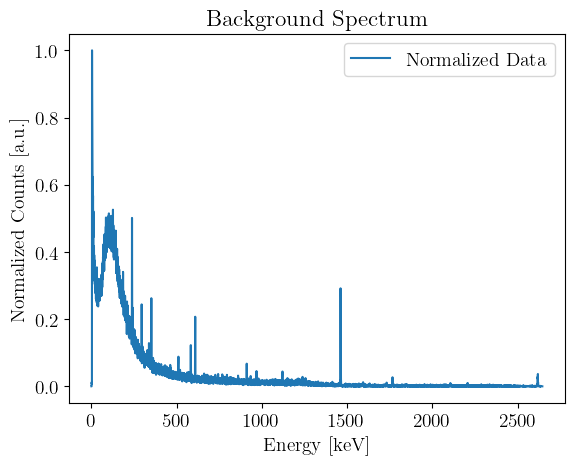

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the data from Task 3
data = np.loadtxt('Task 3/Background.TKA', skiprows=2)

# Normalize the data
normalized_data = data / data.max()

# Calibrate x axis based on fit 
calibrated_x = linear_func(np.arange(len(data)), *popt)


# Plot the data
plt.figure()
plt.plot(calibrated_x, normalized_data)

plt.xlabel('Energy [keV]')
plt.ylabel('Normalized Counts [a.u.]')
plt.title('Background Spectrum')
plt.legend()

plt.show()



Energies of detected peaks: [ 186.42607749  209.6693528   239.04627021  295.54034216  352.35723738
  511.18628537  583.49869746  609.64738219  911.48713803 1121.32226241
 1461.57798717 1766.32315242 2618.57658066]


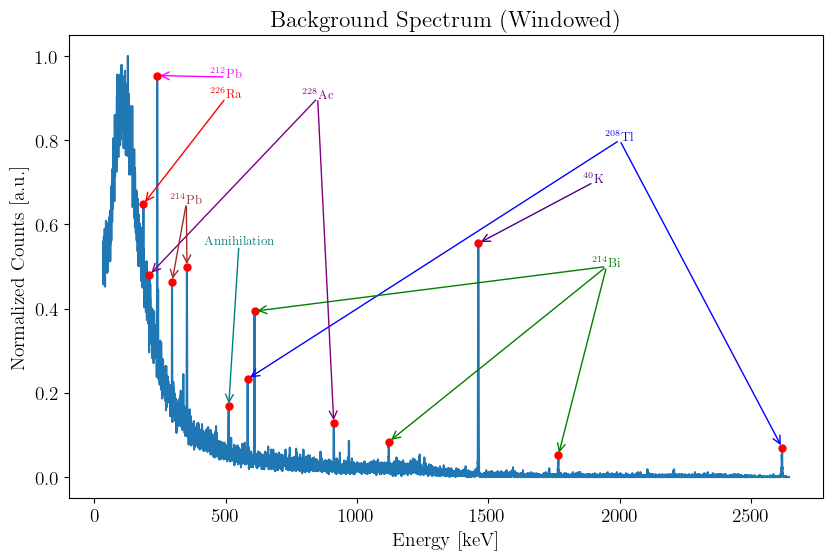

In [308]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the data from Task 3
data = np.loadtxt('Task 3/Background.TKA', skiprows=2)

# Define the window range
window_start = 100
window_end = 8190

# Filter the data within the specified window
filtered_data = data[window_start:window_end]

# Normalize the filtered data
normalized_data = filtered_data / filtered_data.max()

# Calibrate x axis based on fit 
calibrated_x = linear_func(np.arange(window_start, window_end), *popt)

# Create a prominence array that decreases linearly
prominence_start = 0.19
prominence_end = 0.02
prominence_array = np.geomspace(prominence_start, prominence_end, len(normalized_data))

# Find peaks in the normalized data with varying prominence
peaks, _ = find_peaks(normalized_data, prominence=prominence_array)

# Remove the first 4 peaks
peaks = peaks[4:]

peak_energies = calibrated_x[peaks]
print("Energies of detected peaks:", peak_energies)

# Define isotopes and their energies from the table
isotopes = [
    (2618.58, '$^{208}$Tl'),
    (1766.32, '$^{214}$Bi'),
    (1461.58, '$^{40}$K'),
    (1121.32, '$^{214}$Bi'),
    (911.49, '$^{228}$Ac'),
    (609.65, '$^{214}$Bi'),
    (583.50, '$^{208}$Tl'),
    (511.19, 'Annihilation'),
    (352.36, '$^{214}$Pb'),
    (295.54, '$^{214}$Pb'),
    (239.05, '$^{212}$Pb'),
    (209.67, '$^{228}$Ac'),
    (186.43, '$^{226}$Ra')
]

# Map isotopes to peaks
label_positions = {}
for energy, label in isotopes:
    closest_peak_idx = (np.abs(calibrated_x - energy)).argmin()
    if label not in label_positions:
        label_positions[label] = []
    label_positions[label].append(closest_peak_idx)

# Plot the data
plt.figure(figsize=set_size(469*1.5))
plt.plot(calibrated_x, normalized_data)
plt.plot(calibrated_x[peaks], normalized_data[peaks], "o", color='red', markersize=5)

# Annotate the isotopes with a single label pointing to all corresponding peaks
label_text_positions = {
    '$^{208}$Tl': (2000, 0.8),
    '$^{214}$Bi': (1950, 0.5),
    '$^{40}$K': (1900, 0.7),
    '$^{228}$Ac': (850, 0.9),
    'Annihilation': (550, 0.55),
    '$^{214}$Pb': (350, 0.65),
    '$^{212}$Pb': (500, 0.95),
    '$^{226}$Ra': (500, 0.9)
}

# Define colors for each label
colors = {
    '$^{208}$Tl': 'blue',
    '$^{214}$Bi': 'green',
    '$^{40}$K': 'indigo',
    '$^{228}$Ac': 'purple',
    'Annihilation': 'teal',
    '$^{214}$Pb': 'brown',
    '$^{212}$Pb': 'magenta',
    '$^{226}$Ra': 'red'
}

# Annotate the isotopes with colored arrows
for label, indices in label_positions.items():
    color = colors.get(label, 'black')  # Default to black if label not in colors
    label_x, label_y = label_text_positions.get(label, (0, 0))
    for idx in indices:
        if 0 <= idx < len(calibrated_x):  # Ensure index is within bounds
            plt.annotate('', xy=(calibrated_x[idx], normalized_data[idx]), xytext=(label_x, label_y),
                         arrowprops=dict(arrowstyle='->', color=color))
    plt.text(label_x, label_y, label, fontsize=9, ha='center', color=color)

plt.xlabel('Energy [keV]')
plt.ylabel('Normalized Counts [a.u.]')
plt.title('Background Spectrum (Windowed)')
plt.show()

## Task 4